In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.1 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

# load pretrained YOLOv8 model
model = YOLO("yolov8n.pt")  # small model, fast


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


<IPython.core.display.Javascript object>

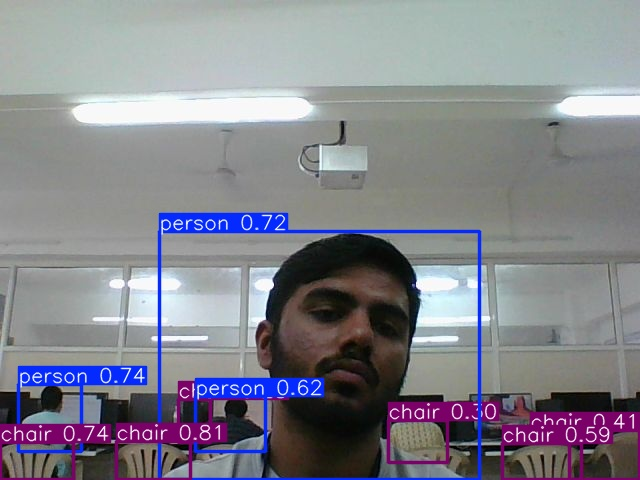

<IPython.core.display.Javascript object>

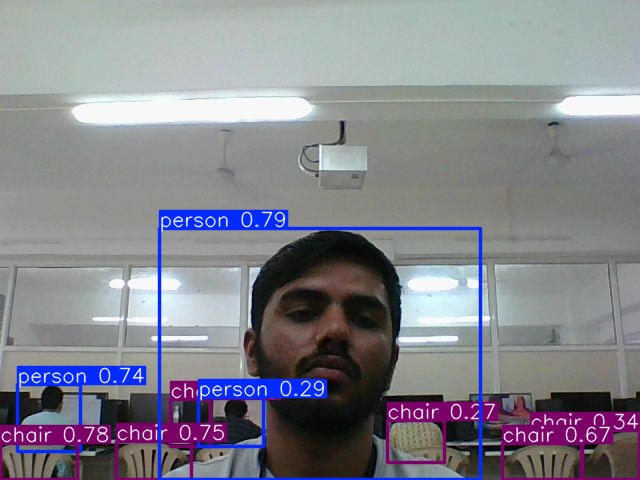

<IPython.core.display.Javascript object>

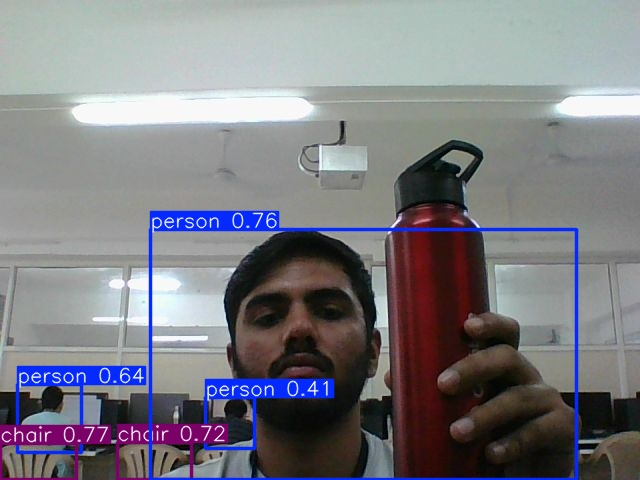

<IPython.core.display.Javascript object>

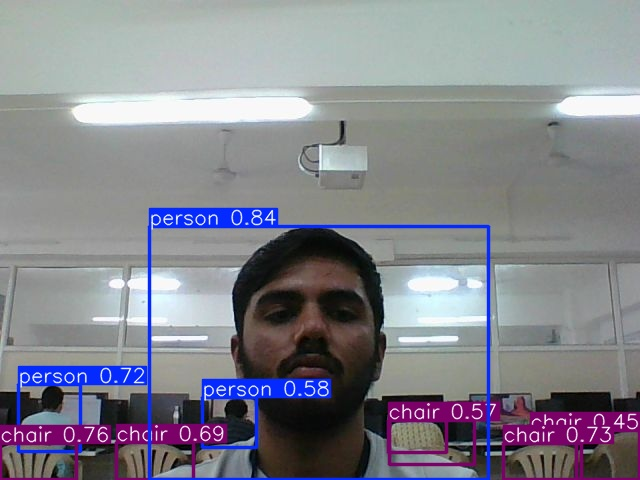

<IPython.core.display.Javascript object>

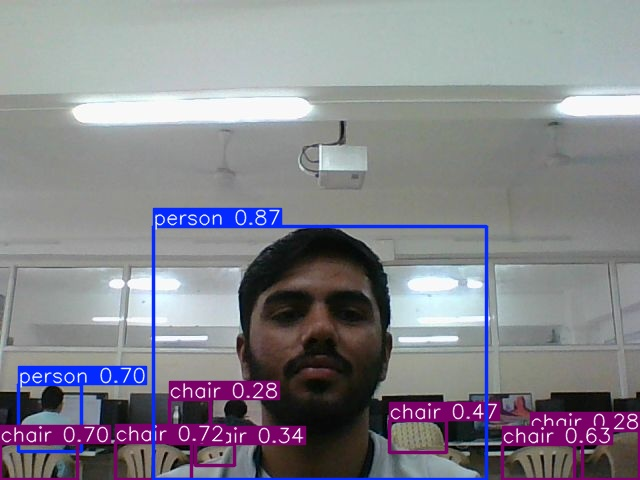

In [7]:
import cv2
import numpy as np
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode


def take_photo(quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const video = document.createElement('video');
        div.appendChild(video);
        document.body.appendChild(div);
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        video.srcObject = stream;
        await video.play();

        // Wait for a frame
        await new Promise((resolve) => setTimeout(resolve, 1000));

        // Draw to canvas
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getVideoTracks()[0].stop();
        div.remove();

        return canvas.toDataURL('image/jpeg', quality);
      }
      takePhoto({quality});
    ''')
    display(js)
    data = eval_js("takePhoto({})".format(quality))
    binary = b64decode(data.split(',')[1])
    arr = np.frombuffer(binary, dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    return img


model = YOLO("yolov8n.pt")  # small and fast


for i in range(5):  # capture 5 frames, you can increase
    frame = take_photo()
    results = model(frame, verbose=False)
    annotated = results[0].plot()

    # Convert to JPEG for display
    _, buffer = cv2.imencode('.jpg', annotated)
    display(Image(data=buffer.tobytes()))
